## Intro & Examples & pseudo inverse

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

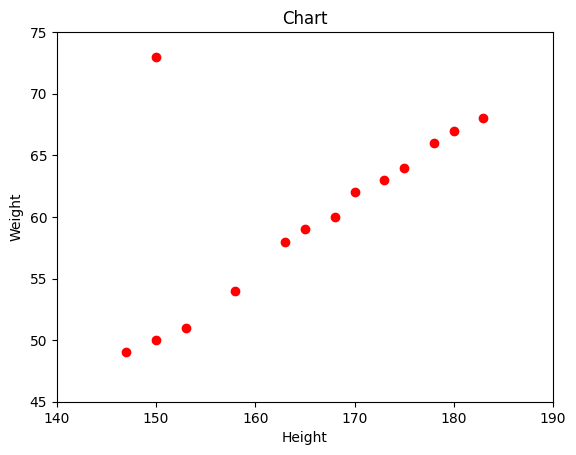

In [3]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 73]]).T

plt.plot(X, y, 'ro')
plt.title('Chart')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.axis([140, 190, 45, 75])
plt.show()


w0 = -1.6485289106047318 and w1 = 0.37487220265821736


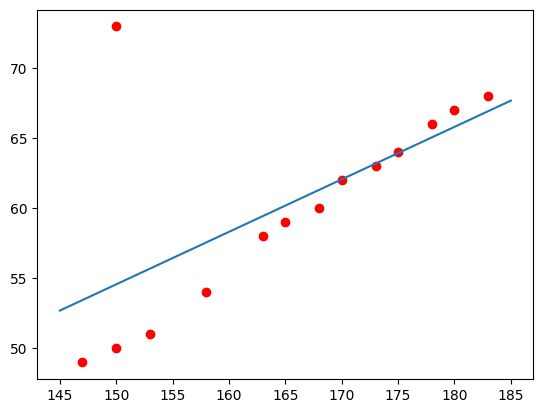

In [4]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
# 2 dong tren la code cua Vu Huu Tiep them cot 1 vao de tinh w0! Nhung chung ta khong can dieu do vi chi can ghi fit_intercept = 1 la no tu tinh w0 roi, bao sao plot thang nay ko duoc nhu thang Diabete
# a thuc ra la van can do chung ta dang cai` lai 1 cach thu cong nen can size 2 x thi moi ra ouput la 2 thang w0 w1 duoc :))
# in matplotlib it would be pd.concat(dataframe A, dataframe B, axis = True/False)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
sol = np.dot(np.linalg.pinv(A), b)
w0 = sol[0][0]
w1 = sol[1][0]
print(f"w0 = {w0} and w1 = {w1}")

plt.plot(X, y, 'ro')
xl = np.linspace(145, 185, 2)
yl = xl * w1 + w0
plt.plot(xl, yl)


results from scikit-learn: (array([0.3748722]), np.float64(-1.6485289105986638))
results from me: [[-1.64852891  0.3748722 ]]
(14, 1) (14,)


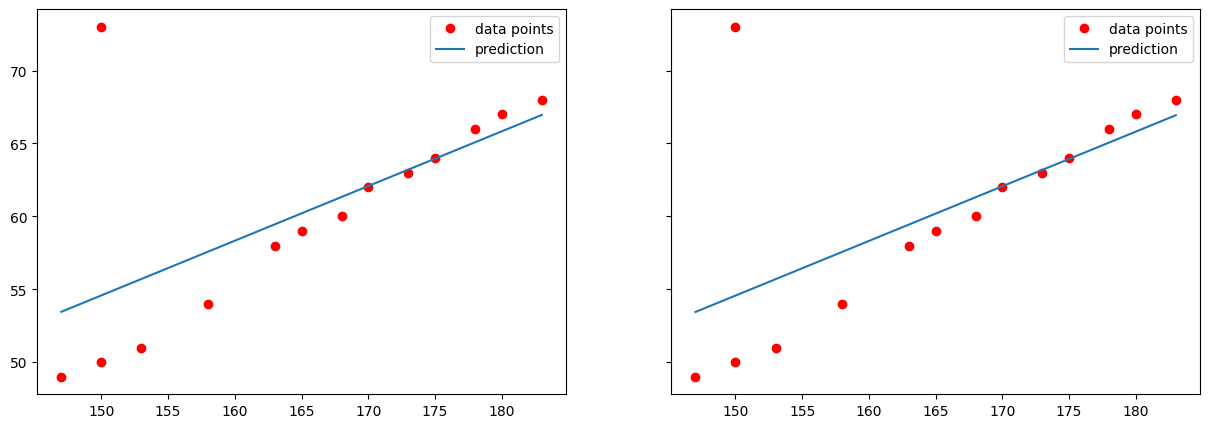

In [5]:
from sklearn.linear_model import LinearRegression, Ridge

lr = LinearRegression(fit_intercept = True) # false to calculate bias --> LMAO fit_intercept = True kia moi tinh bias, ban dau code a Tiep fit_intercept = False vi anh lr.fit(Xbar, y) ma Xbar la (14, 2) va y la 2D =)). bh minh fit_intercept = True thi y phai giam xuong con 1 chieu de tinh moi w1 thoi con model se tinh w0 gium minh
lr.fit(X, y.reshape(-1)) # phai reshape thang y lai thanh 1 chieu no' moi giong LinearRegression o bai Diabete (return_X_y = True) va nhu vay thi no moi ra y1 la (2, ) thay vi (1, 2)
# noi chung la lr.fit(X shape ntn, y shape ntn) thi no se ra lr.coef la 1 chieu, chua tat ca w1 w2,... con lr.intercept thi la 1 scalar?
print(f"results from scikit-learn: {lr.coef_, lr.intercept_}")
print(f"results from me: {sol.T}")


lr2 = Ridge(alpha = .5)
lr2.fit(X, y.reshape(-1))


fig, ax = plt.subplots(ncols = 2, figsize = (15, 5), sharex = True, sharey = True)

ax[0].plot(X, y, 'ro', label = "data points")
x1 = np.linspace(X.min(), X.max(), 2)
y1 = x1 * lr.coef_ + lr.intercept_
ax[0].plot(x1, y1, label = "prediction")
ax[0].legend()

ax[1].plot(X, y, 'ro', label = "data points")
y2 = x1 * lr2.coef_ + lr.intercept_
ax[1].plot(x1, y2, label = "prediction")
ax[1].legend()

print(X.shape, y.reshape(-1).shape)

## Next problem: Diabete 
#### Ordinary Least Square: min of $||Xw - y||_2 ^ 2$ with respect to w

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X, y = load_diabetes(return_X_y = True)
X = X[:, [2]] # select all rows (or 0:n+1) and the third column, as a 2D np array (or 1D if "2" only not "[2]")
# [l : r] -> 1D, take elements in range [l, r). [ l1 : r1 , l2 : r2] -> 2D... 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, shuffle = False)
print(X.shape, y.shape)


(442, 1) (442,)


In [7]:
lr.fit(X_train, y_train) # fit_intercept = True o tren roi nen no co bias)
prediction = lr.predict(X_test)
print(f"Mean square error: {mean_squared_error(y_test, prediction):.2f}")
print(f"How good? {r2_score(y_test, prediction):.2f}") # score(A, B) != score(B, A)

Mean square error: 2548.07
How good? 0.47


In [8]:
# playground
X_test
df = pd.DataFrame(X_test, columns = ["Handsomeness"])
df_train = pd.DataFrame(y_test, columns = ["Result"])
df_table = pd.concat([df, df_train], axis = 1)
df_table.head(5)

,Handsomeness,Result
0,0.077863,233.0
1,-0.039618,91.0
2,0.011039,111.0
3,-0.040696,152.0
4,-0.034229,120.0


In [9]:
# Code from scratch
one = np.ones((X_train.shape[0], 1))
new_X_train = np.concatenate((one, X_train), axis = 1)
A = np.dot(new_X_train.T, new_X_train)
b = np.dot(new_X_train.T, y_train)
sol = np.dot(np.linalg.pinv(A), b)
sol
w0 = sol[0]
w1 = sol[1]
y_pred = X_test * w1 + w0

In [10]:
# calculate errors
print(f"Mean square error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"How good?: {r2_score(y_test, y_pred):.2f}") # better than scikit-learn lmao


Mean square error: 2548.07
How good?: 0.47


Text(0.5, 0.98, 'Linear Regression')

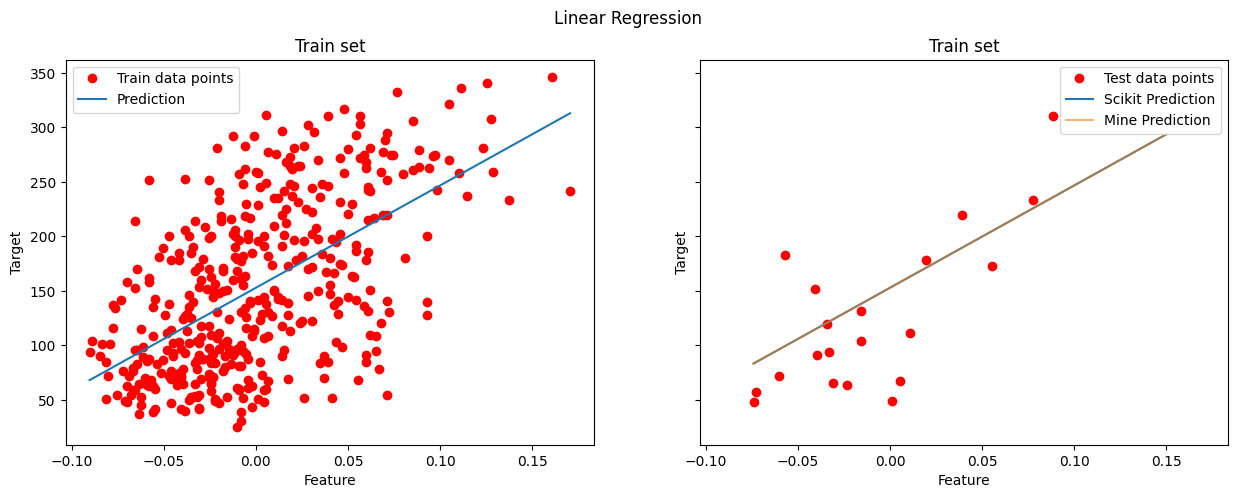

In [14]:
# Plot

# Scikit-learn

# plt.subplots(1, 3)
# plt.plot(X_train, y_train, 'ro')
# x1 = np.linspace(X_train.min(), X_train.max(), 2)
# y1 = x1 * lr.coef_ + lr.intercept_
# plt.plot(x1, y1, label = "Model prediction", color = 'blue')
# plt.scatter(X_train, y_train, label = "Test train datapoints", color = 'red')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(X_train, y_train, 'ro')

fig, ax = plt.subplots(ncols = 2, figsize = (15, 5), sharex = True, sharey = True)


ax[0].plot(X_train, y_train, 'ro', label = "Train data points")
x1 = np.linspace(X_train.min(), X_train.max(), 2)
y1 = x1 * lr.coef_ + lr.intercept_
ax[0].plot(x1, y1, label = "Prediction")
ax[0].set(xlabel = "Feature", ylabel = "Target", title = "Train set")
ax[0].legend()

ax[1].plot(X_test, y_test, 'ro', label = "Test data points")
x1 = np.linspace(X_test.min(), 0.15, 2)
y1 = x1 * lr.coef_ + lr.intercept_
ax[1].plot(x1, y1, label = "Scikit Prediction")
y1 = x1 * w1 + w0
ax[1].plot(x1, y1, label = "Mine Prediction", alpha = .6)
ax[1].set(xlabel = "Feature", ylabel = "Target", title = "Train set")
ax[1].legend()
# Scikit va my prediction la TRUNG nhau luon!

fig.suptitle('Linear Regression')